1790번 수 이어 쓰기 2 <span style="color:red">실패</span> - 2025.06.22

In [ ]:
n, k = map(int, input().split())

start = 0
digit = 1
nine = 9

while k > nine * digit:
    k -= digit * nine
    start += nine
    nine *= 10
    digit += 1

ans = start + 1 + (k - 1) // digit

if ans > n:
    print(-1)
else:
    print(str(ans)[(k - 1) % digit])

1654번 랜선 자르기 <span style="color:green">성공</span> - 2025.06.23

In [ ]:
def binary_search():
    start = 1
    end = lines[-1]

    while start <= end:
        mid = (start + end) // 2

        cnt = 0
        for line in lines:
            cnt += line//mid

        if cnt >= n:
            start = mid + 1
            ans = mid
        else:
            end = mid - 1
    return ans

k, n = map(int, input().split())
lines = [int(input()) for _ in range(k)]
lines.sort()

print(binary_search())

2805번 나무 자르기 <span style="color:red">실패</span> - 2025.06.24

In [ ]:
def binary_search():
    start = 1
    end = trees[-1]

    ans = 0
    while start <= end:
        mid = (start + end) // 2

        cnt = 0
        for tree in trees:
            cnt += tree - mid if tree >= mid else 0

        if cnt >= m:
            start = mid + 1
            ans = mid
        else:
            end = mid - 1
    return ans

n, m = map(int, input().split())
trees = list(map(int, input().split()))
trees.sort()

print(binary_search())

2110번 공유기 설치 <span style="color:green">성공</span> - 2025.06.25

In [ ]:
def binary_search():
    start = 1
    end = x[-1] - x[0]

    ans = 0
    while start <= end:
        mid = (start + end) // 2

        cnt = 1
        prev_x = x[0]
        for i in range(1, n):
            if x[i] - prev_x >= mid:
                prev_x = x[i]
                cnt += 1

        if cnt >= c:
            ans = mid
            start = mid + 1
        else:
            end = mid - 1
    return ans

n, c = map(int, input().split())
x = [int(input()) for _ in range(n)]
x.sort()

print(binary_search())

1939번 중량제한 <span style="color:red">실패</span> - 2025.06.26

In [ ]:
# 다익스트라 풀이
import sys
import heapq
# input = sys.stdin.readline

def dijkstra(start, end):
    q = []
    heapq.heappush(q, (0, start))

    while q:
        dist, now = heapq.heappop(q)
        dist *= -1

        if now == end:
            print(dist)
            break

        if distance[now] > dist:
            continue

        for i in graph[now]:
            if dist == 0:
                distance[i[1]] = i[0]
                heapq.heappush(q, (-distance[i[1]], i[1]))
            elif distance[i[1]] < i[0] and distance[i[1]] < dist:
                distance[i[1]] = min(dist, i[0])
                heapq.heappush(q, (-distance[i[1]], i[1]))

n, m = map(int, input().split())
graph = [[] for _ in range(n + 1)]
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((c, b))
    graph[b].append((c, a))

for i in range(1, n + 1):
    graph[i].sort(reverse=True)

distance = [0 for _ in range(n + 1)]
start, end = map(int, input().split())

dijkstra(start, end)

In [ ]:
# BFS 풀이
import sys
from collections import deque
# input = sys.stdin.readline

def bfs(w):
    global visited

    q = deque()
    q.append(s)

    while q:
        bridges = graph[q.popleft()]

        for bridge in bridges:
            if bridge[0] == e and bridge[1] >= w:
                return True
            if bridge[1] >= w and visited[bridge[0]] == 0:
                visited[bridge[0]] = 1
                q.append(bridge[0])
    return False

def binary_search():
    global visited

    start = 1
    end = 1e9

    ans = 0
    while start <= end:
        mid = (start + end) // 2

        visited = [0 for _ in range(n + 1)]
        visited[s] = 1
        if bfs(mid):
            start = mid + 1
            ans = mid
        else:
            end = mid - 1
    return ans

n, m = map(int, input().split())
graph = [[] for _ in range(n + 1)]
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))
    graph[b].append((a, c))
s, e = map(int, input().split())
visited = [0 for _ in range(n + 1)]
visited[s] = 1

print(int(binary_search()))

2022번 사다리 <span style="color:green">성공</span> - 2025.06.27

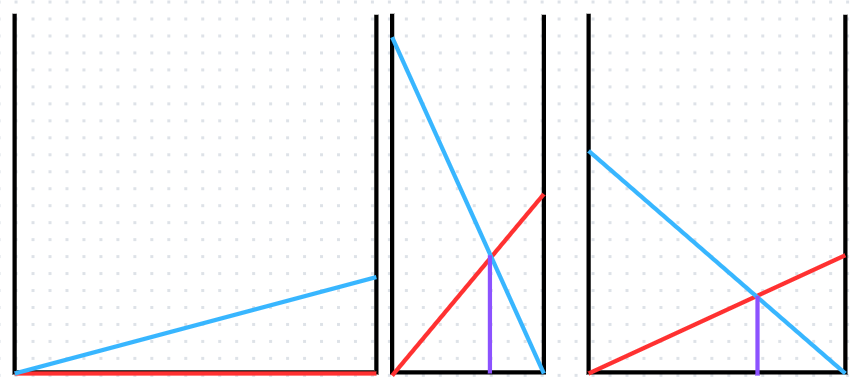

In [ ]:
# 그림 그리면서 천천히 생각해보기...
# 문제에 1e-3 오차까지 괜찮다고 나와있으니
# 이거 실수라서 직전 mid값과 현재 mid값을 
# 소수점 4자리에서 반올림한 값이 같다면 return (아니면 시간초과)
# 각 x, y선이 건물과 이루는 높이를 구하고 (각 삼각형의 높이)
# 이 두 높이의 비율을 사용해 밑변 기준 교차점을 구한다.
def binary_search():
    start = 0
    end = min(x, y)

    prev_mid = 0
    while start <= end:
        mid = (start + end) / 2

        xh = (x**2 - mid**2)**0.5
        yh = (y**2 - mid**2)**0.5

        cross_point = mid * xh / (xh + yh)
        h = round(yh * cross_point / mid, 3)

        if h == c or prev_mid == round(mid, 3):
            return round(mid, 3)
        elif h > c:
            start = mid
            prev_mid = round(mid, 3)
        elif h < c:
            end = mid
            prev_mid = round(mid, 3)

x, y, c = map(float, input().split())

print(f'{binary_search():.3f}')

11664번 선분과 점 <span style="color:green">성공</span> - 2025.06.28

$$Heron's\;Formula$$
$$
S=\sqrt{s(s-a)(s-b)(s-c)},\;s=\frac{a+b+c}{2}
$$

In [ ]:
def calculate_len(x1, x2, y1, y2, z1, z2):
    return ((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)**0.5

def calculate_area(len1, len2, len3):
    s = (len1 + len2 + len3) / 2
    return (s * (s - len1) * (s - len2) * (s - len3))**0.5

ax, ay, az, bx, by, bz, cx, cy, cz = map(int, input().split())
len_ab = calculate_len(ax, bx, ay, by, az, bz)
len_ac = calculate_len(ax, cx, ay, cy, az, cz)
len_bc = calculate_len(bx, cx, by, cy, bz, cz)

if round(len_bc**2, 6) >= round(len_ab**2, 6) + round(len_ac**2, 6):
    print(f'{len_ac:.10f}')
elif round(len_ac**2, 6) >= round(len_ab**2, 6) + round(len_bc**2, 6):
    print(f'{len_bc:.10f}')
else:
    area = calculate_area(len_ab, len_ac, len_bc)
    print(f'{(2 * area / len_ab):.10f}')